## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [38]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [39]:
df = pd.read_csv('data/onemin-Ground-2017-01-01.csv')

In [40]:
# Assuming your dataframe is called 'df'

# List of features we want to keep
features = [
    'TIMESTAMP',
    'AmbTemp_C_Avg',
    'WindSpeedAve_ms',
    'WindDirAve_deg',
    'RTD_C_Avg_1',
    'RTD_C_Avg_2',
    'RTD_C_Avg_3',
    'RTD_C_Avg_4',
    'RTD_C_Avg_5',
    'RTD_C_Avg_6',
    'RTD_C_Avg_7',
    'RTD_C_Avg_8',
    'RTD_C_Avg_9',
    'RTD_C_Avg_10'
]

# Target variable
target = 'PwrMtrP_kW_Avg'

# Create a new dataframe with only the features and target variable we want
df_selected = df[features + [target]]

# Using mean
df_selected['WindSpeedAve_ms'].fillna(df_selected['WindSpeedAve_ms'].mean(), inplace=True)

# List of RTD columns
rtd_columns = ['RTD_C_Avg_1', 'RTD_C_Avg_2', 'RTD_C_Avg_3', 'RTD_C_Avg_4', 'RTD_C_Avg_5', 
               'RTD_C_Avg_6', 'RTD_C_Avg_7', 'RTD_C_Avg_8', 'RTD_C_Avg_9', 'RTD_C_Avg_10']

# Create a new column with the average of all RTD readings
df_selected['RTD_C_Avg_Mean'] = df_selected[rtd_columns].mean(axis=1)

# If you want to drop the original RTD columns:
df_selected = df_selected.drop(columns=rtd_columns)

# Assuming your dataframe is named df_selected and the timestamp column is 'TIMESTAMP'
df_selected['TIMESTAMP'] = pd.to_datetime(df_selected['TIMESTAMP'])

# Extract the minute component
df_selected['Minutes_Since_Midnight'] = df_selected['TIMESTAMP'].dt.hour * 60 + df_selected['TIMESTAMP'].dt.minute

df_selected = df_selected.drop("TIMESTAMP", axis=1)

C:\Users\73773\AppData\Local\Temp\ipykernel_32356\3176975456.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['WindSpeedAve_ms'].fillna(method = 'bfill', inplace=True)
C:\Users\73773\AppData\Local\Temp\ipykernel_32356\3176975456.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['RTD_C_Avg_Mean'] = df_selected[rtd_columns].mean(axis=1)


#### Show Top 5 Records

In [41]:
df_selected.head()

,AmbTemp_C_Avg,WindSpeedAve_ms,WindDirAve_deg,PwrMtrP_kW_Avg,RTD_C_Avg_Mean,Minutes_Since_Midnight
0,6.851,1.325,212.2,0.0,6.0638,0
1,6.804,2.260,205.5,0.0,6.0546,1
2,6.751,2.162,213.2,0.0,6.0463,2
3,6.792,2.167,207.9,0.0,6.0335,3
4,6.768,2.368,216.0,0.0,6.0257,4


In [42]:
df_selected.describe()

,AmbTemp_C_Avg,WindSpeedAve_ms,WindDirAve_deg,PwrMtrP_kW_Avg,RTD_C_Avg_Mean,Minutes_Since_Midnight
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,6.612212,1.089711,192.287051,32.972390,7.976494,719.500000
std,2.349314,0.882370,110.112867,54.106284,7.448912,415.836506
min,2.536000,0.077000,0.000000,-0.577000,0.032000,0.000000
25%,4.738500,0.442000,93.800000,0.000000,2.365825,359.750000
50%,6.113500,0.818000,204.700000,0.000000,4.899800,719.500000
75%,8.500000,1.503500,294.900000,57.695000,13.400500,1079.250000
max,11.350000,7.207000,359.800000,206.100000,25.488000,1439.000000


#### Preparing X and Y variables

In [43]:
X = df_selected.drop(columns=['PwrMtrP_kW_Avg'],axis=1)

In [44]:
X.head()

,AmbTemp_C_Avg,WindSpeedAve_ms,WindDirAve_deg,RTD_C_Avg_Mean,Minutes_Since_Midnight
0,6.851,1.325,212.2,6.0638,0
1,6.804,2.260,205.5,6.0546,1
2,6.751,2.162,213.2,6.0463,2
3,6.792,2.167,207.9,6.0335,3
4,6.768,2.368,216.0,6.0257,4


In [45]:
y = df['PwrMtrP_kW_Avg']

In [46]:
y[480:720]

480     10.39
481     11.39
482     11.57
483     11.33
484     11.91
        ...  
715    165.80
716    161.70
717    134.80
718    156.30
719    167.90
Name: PwrMtrP_kW_Avg, Length: 240, dtype: float64

In [47]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [48]:
X = preprocessor.fit_transform(X)

In [49]:
X.shape

(1440, 5)

In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1152, 5), (288, 5))

#### Create an Evaluate Function to give all metrics after model Training

In [51]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 15.1974
- Mean Absolute Error: 12.6542
- R2 Score: 0.9215
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15.0890
- Mean Absolute Error: 12.7153
- R2 Score: 0.9204


Lasso
Model performance for Training set
- Root Mean Squared Error: 15.9147
- Mean Absolute Error: 12.5654
- R2 Score: 0.9139
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16.1745
- Mean Absolute Error: 13.0500
- R2 Score: 0.9086


Ridge
Model performance for Training set
- Root Mean Squared Error: 15.1987
- Mean Absolute Error: 12.6341
- R2 Score: 0.9214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15.0996
- Mean Absolute Error: 12.7139
- R2 Score: 0.9203


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.1333
- Mean Absolute Error: 3.8949
- R2 Score: 0.9716
-----------

### Results

In [53]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.974015
7,CatBoosting Regressor,0.965826
6,XGBRegressor,0.965362
4,Decision Tree,0.960205
8,AdaBoost Regressor,0.955179
3,K-Neighbors Regressor,0.946628
0,Linear Regression,0.920431
2,Ridge,0.920320
1,Lasso,0.908571


## Random Forest Regressor

In [54]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 97.39


## Plot y_pred and y_test

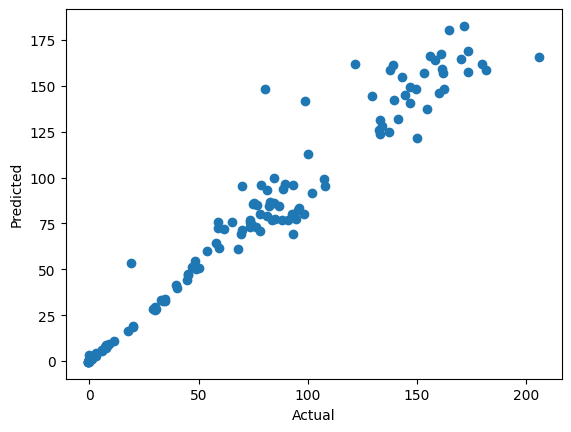

In [56]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

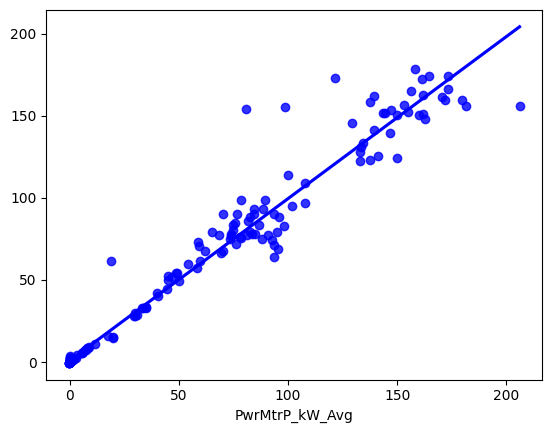

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');

#### Difference between Actual and Predicted Values

In [57]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df = pred_df.reset_index(drop=True)
pred_df

,Actual Value,Predicted Value,Difference
0,0.00,0.0000,0.0000
1,54.01,59.7567,-5.7467
2,40.19,39.8991,0.2909
3,0.00,0.0000,0.0000
4,76.70,85.0366,-8.3366
...,...,...,...
283,0.00,0.0000,0.0000
284,0.00,0.0000,0.0000
285,0.00,0.0000,0.0000
286,19.80,18.6471,1.1529
